# Learning Curves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster

from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree
# import the whole model selection module
from sklearn import model_selection
sns.set_theme(palette='colorblind')

Today, we'll load a new dataset and use the default sklearn data structure for datasets.  We get back the default data stucture when we use a `load_` function without any parameters at all.

In [2]:
digits = datasets.load_digits()

This shows us that the type is defined by sklearn and they called it `bunch`:

In [3]:
type(digits)

sklearn.utils.Bunch

We can print it out to begin exploring it.

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

We note that it has key value pairs, and that the last one is called `DESCR` and is text that describes the data.  If we send that to the print function it will be formatted more readably.

In [5]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

This tells us that we are going to be predicting what digit (0,1,2,3,4,5,6,7,8, or 9) is in the image.

To get an idea of what the images look like, we can use `matshow` which is short for matrix show. It takes a 2D matrix and plots it as a grayscale image. To get the actual color bar, we use the matplotlib `plt.gray()`.  
````{margin}
```{admonition} Try it yourself
Try using matshow without `plt.gray()`. How is it different?  What might alternatives do?  What other code in this notebook influences how plots look?
```
```{tip}
Removing a line from an excerpt of code can help you see hat that line did and learn more about how each piece work.
```
````

<Figure size 432x288 with 0 Axes>

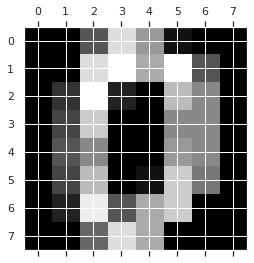

In [6]:
plt.gray()
plt.matshow(digits.images[0])

`bunch` objects are designed for machine learning, so they have the features as "data" and target explicitly identified.

In [7]:
digits_X = digits.data
digits_y = digits.target

We can further check the type and shape of these

In [8]:
type(digits_y)

numpy.ndarray

```{note}
because this is the target, it's okay that this is one dimensional.
```

In [9]:
digits_y.shape

(1797,)

In [10]:
digits_X.shape

(1797, 64)

This has one row for each sample and has reshaped the 8x8 image into a 64 length vector. So we have one 'feature' for each pixel in the images.

We are going to do some model comparison, so we will instantiate estimator objects for two different classifiers.

In [11]:
svm_clf = svm.SVC(gamma=0.001)
gnb_clf = naive_bayes.GaussianNB()

We're going to use a [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) object to do Cross validation with 100 iterations to get smoother mean test and train
score curves, each time with 20% data randomly selected as a validation set.

```{admonition} Further Reading

You can see visualization of different [cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualize-cross-validation-indices-for-many-cv-objects) types in the sklearn documentation.
```

In [12]:
cv = model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

```{note}
This object has a `random_state` object, the `GridSearchCV` that we were using didn't have a way to control the random state directly, but it accepts not only integers, but also cross validation objects to the `cv` parameter. The KFold cross validation object also has that parameter, so we could repeat what we did in previous classes by creating a `KFold` object with a fixed random state.
```

<!-- ```{code-cell} ipython3
# this is why gridsearch cv doesn't have random state
model_selection.KFold()
``` -->

We'll also create a linearly spaced list of training percentages and we'll also divide it into more jobs to be more computationally efficient.

In [13]:
train_sizes=np.linspace(0.1, 1.0, 5)
n_jobs=4

```{admonition} Try it yourself
Try varying the `n_jobs` parameter and tmiing the execution using the
[timit magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)
```

Now we can create the learning curve.

In [14]:
train_sizes_svm, train_scores_svm, test_scores_svm, fit_times_svm, score_times_svm = model_selection.learning_curve(
    svm_clf,
    digits_X,
    digits_y,
    cv=cv,
    n_jobs=n_jobs,
    train_sizes=train_sizes,
    return_times=True,)

KeyboardInterrupt: 

It returns the list of the counts for each training size (we input percentages and it returns counts)

In [ ]:
train_sizes_svm

The other parameters, it returns a list for each length that's 100 long because our cross validation was 100 iterations.

In [ ]:
fit_times_svm.shape

We can save it in a DataFrame after averaging over the 100 trials.

In [ ]:
svm_learning_df = pd.DataFrame(data = train_sizes_svm, columns = ['train_size'])
# svm_learning_df['train_size'] = train_sizes_svm
svm_learning_df['train_score'] = np.mean(train_scores_svm,axis=1)
svm_learning_df['test_score'] = np.mean(test_scores_svm,axis=1)
svm_learning_df['fit_time'] = np.mean(fit_times_svm,axis=1)
svm_learning_df['score_times'] = np.mean(score_times_svm,axis=1)

then we can look at the DataFrame

In [ ]:
svm_learning_df.head()

We can use our skills in transforming data to make it easier to exmine just a subset of the scores.
````{margin}
```{hint}
This is *one* thing we can analyze, but there are others. To earn prepare on assignment 11,  manipulate your reuslts a different way.
```
````

In [ ]:
svm_learning_df_scores = svm_learning_df.melt(id_vars=['train_size'],value_vars=['train_score','test_score'])

svm_learning_df_scores.head(2)

This new DataFrame allows us to make convenient plots.

````{margin}
```{tip}
Getting used to thinking though these sorts of manipulations can take time, but
is valuable. Investing time to learn these things will help you both write
shorter, more readable, easy to examine, code (which is nicer to your co-workers)
and help you develop flexible mental representation.  The flexiblity of your
mental model of material is the way learning scientists distinguish compentent
practioners from experts.  

```
````

In [ ]:
sns.lineplot(data = svm_learning_df_scores, x ='train_size', y='value',hue='variable')

In [ ]:
train_sizes_gnb, train_scores_gnb, test_scores_gnb, fit_times_gnb, score_times_gnb = model_selection.learning_curve(
    gnb_clf,
    digits_X,
    digits_y,
    cv=cv,
    n_jobs=n_jobs,
    train_sizes=train_sizes,
    return_times=True,)

We can do the same for Gaussian Naive Bayes

In [ ]:
gnb_learning_df = pd.DataFrame(data = train_sizes_gnb, columns = ['train_size'])
# gnb_learning_df['train_size'] = train_sizes_gnb
gnb_learning_df['train_score'] = np.mean(train_scores_gnb,axis=1)
gnb_learning_df['test_score'] = np.mean(test_scores_gnb,axis=1)
gnb_learning_df['fit_time'] = np.mean(fit_times_gnb,axis=1)
gnb_learning_df['score_times_gnb'] = np.mean(score_times_gnb,axis=1)

In [ ]:
gnb_learning_scores = gnb_learning_df.melt(id_vars=['train_size'],value_vars=['train_score','test_score'])
sns.lineplot(data = gnb_learning_scores, x ='train_size', y='value',hue='variable')

````{margin}
```{admonition} Question in Class
This was a question after class, but the answer makes more sense inline here.
```
````
These scores are overall not as high as the SVM (note the values on the y axis. )

## Questions After Class


### When would I use an SVM?

```{toggle}
SVMs are a very powerful model and they're good when you need relatively quick
training (and test) time, a model that takes a small amount of memory (eg running
  the prediction on a mobile device or smart device), with high accuracy.  
```